In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

import sys
sys.path.append("../../scripts")

from model import Model, model_from_file
from norms import *

%matplotlib inline

In [37]:
plt.rcParams.update({'font.size': 14})

In [38]:
def model_plot(model, times, **kwargs):
	if 'figsize' in kwargs:
		plt.figure(figsize=kwargs['figsize'])
	if 'title' in kwargs:
		plt.title(kwargs['title'])
	if 'xlim' in kwargs:
		plt.xlim(kwargs['xlim'])
	if 'ylim' in kwargs:
		plt.ylim(kwargs['ylim'])
	plt.xlabel('$x$')
	plt.ylabel(r'$\phi$')
	t_indices = [model.t_index(t) for t in times]
	for i in t_indices:
	    plt.plot(model.xs, model.phi[i])
	plt.legend(['$t = {:.3e}$'.format(model.ts[i]) for i in t_indices],
		bbox_to_anchor=(1.02, 1), loc="upper left")
	plt.show()

In [39]:
models_dir = 'data_birth/'

In [40]:
model = model_from_file(models_dir + 'model.csv')

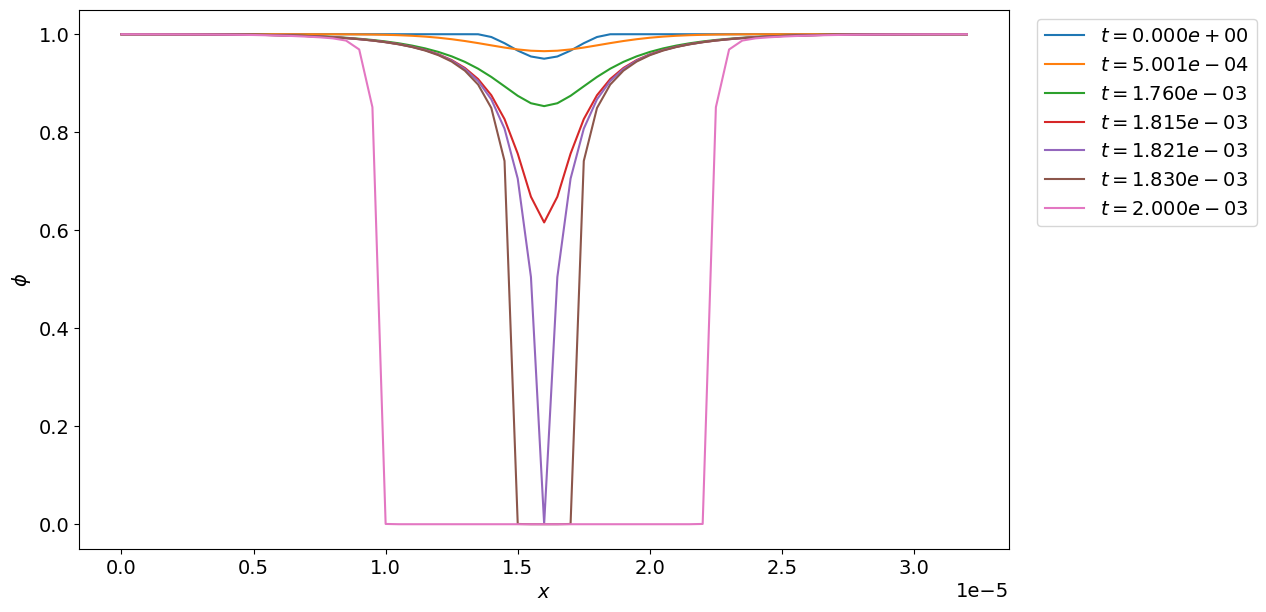

In [43]:
ts = [0, 5.001e-4, 1.76e-3, 1.815e-3, 1.821e-3, 1.83e-3, 2e-3]
model_plot(model, ts, figsize=(12, 7))